# Instantiating Packages

In [160]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

# Importing Data

In [161]:
# Data is in JSON format. use read_json
data = pd.read_json('json_loan.json')
data1 = pd.read_json('json_loan.json')
data.head()

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,LP001002,Male,No,0,Graduate,No,1,Urban,medium,Y
1,LP001003,Male,Yes,1,Graduate,No,1,Rural,medium,N
2,LP001005,Male,Yes,0,Graduate,Yes,1,Urban,low,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1,Urban,low,Y
4,LP001008,Male,No,0,Graduate,No,1,Urban,medium,Y


## Check for NA

In [162]:
data.isnull().sum()

Application_ID        0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Credit_History        0
Property_Area         0
Income                0
Application_Status    0
dtype: int64

# EDA with various features with respect to Application status(Approved or Not)


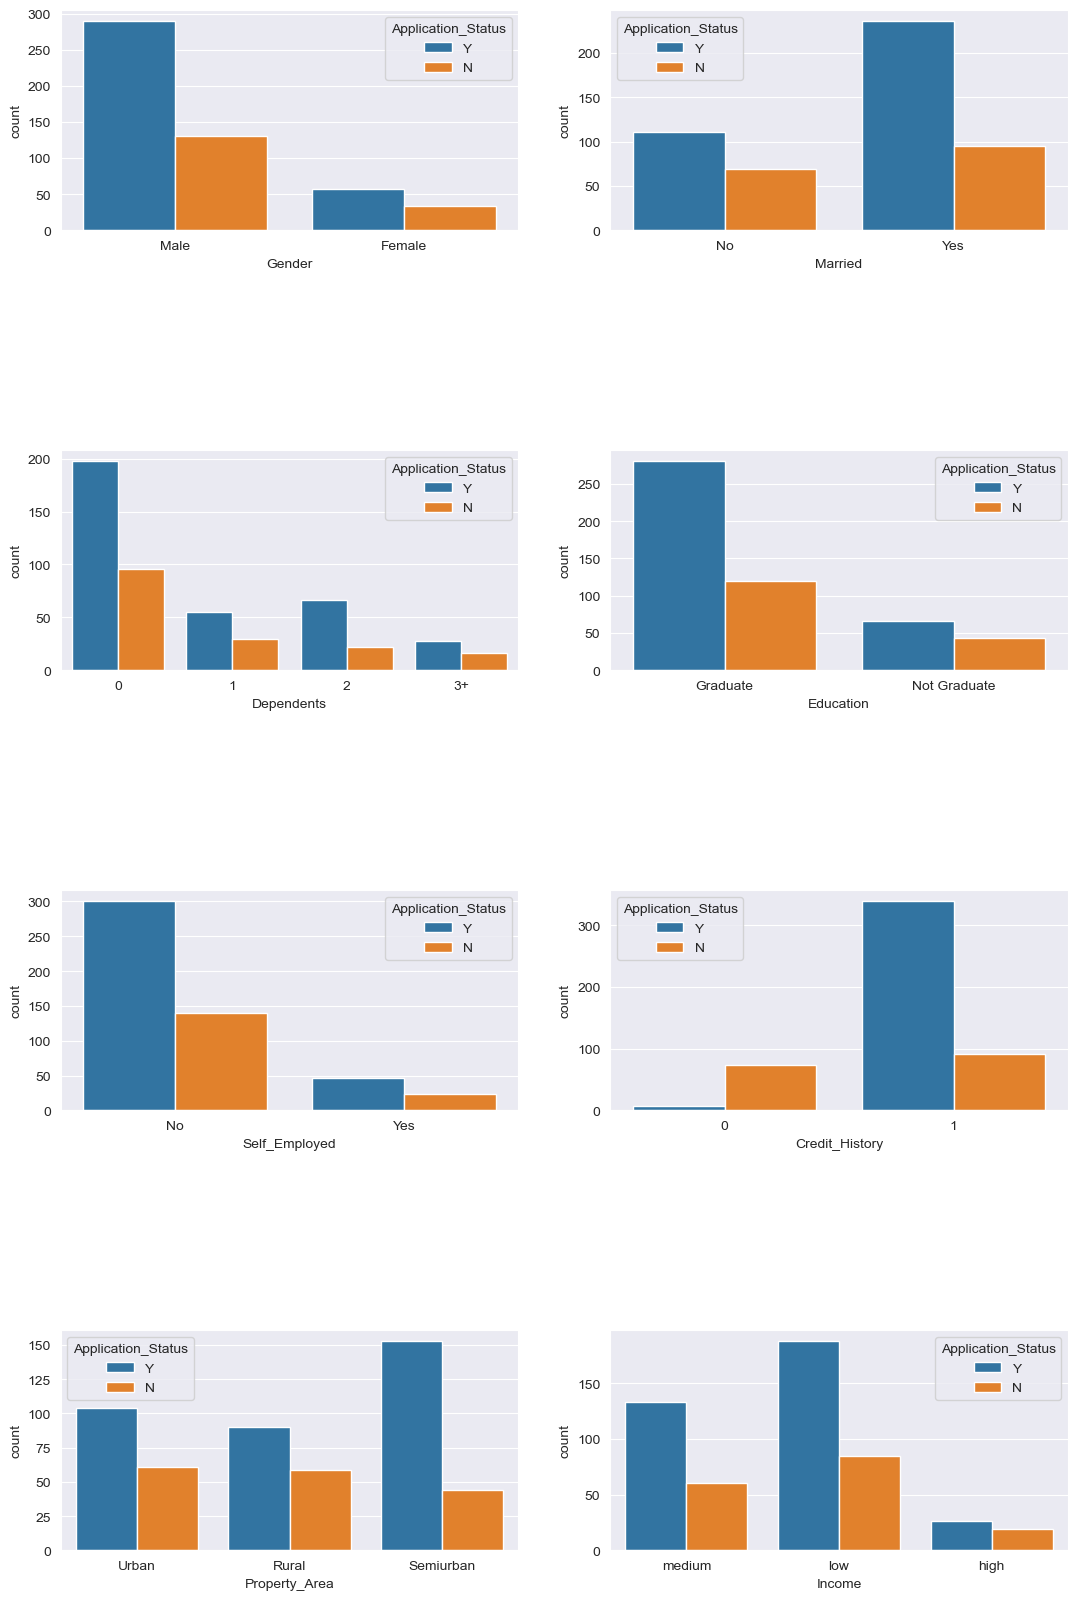

In [163]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(4,2,figsize=(13,20))
for id,i in enumerate(data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]):
    row,col = id//2,id%2
    sb.countplot(x=i,data=data,hue='Application_Status',ax=axes[row,col])
plt.subplots_adjust(hspace=1)


### 1. % of total applicants for each unique value of dependents
### Ans - As you can see Maximum application filled are from 0 dependant

In [164]:
l=data.groupby(data['Dependents'])
l.count()

,Application_ID,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
Dependents,,,,,,,,,
0,294,294,294,294,294,294,294,294,294
1,85,85,85,85,85,85,85,85,85
2,88,88,88,88,88,88,88,88,88
3+,44,44,44,44,44,44,44,44,44


In [165]:
print(round(294/511*100),"% of total applicats are with 0 -dependents")
print(round(85/511*100),"% of total applicats are with 1 -dependents")    
print(round(88/511*100),"% of total applicats are with 2 -dependents")
print(round(44/511*100)," % of total applicats are with 3+ -dependents")

58 % of total applicats are with 0 -dependents
17 % of total applicats are with 1 -dependents
17 % of total applicats are with 2 -dependents
9  % of total applicats are with 3+ -dependents


###  2. % of applications approved for self employed applicants
### Ans - 9% SELF EMPLOYED  candidates GETS THEIR loan APPROVED

In [166]:
data.groupby(['Self_Employed','Application_Status']).count()

Application_ID  Gender  Married  Dependents  \
Self_Employed Application_Status                                                
No            N                              140     140      140         140   
              Y                              301     301      301         301   
Yes           N                               24      24       24          24   
              Y                               46      46       46          46   

                                  Education  Credit_History  Property_Area  \
Self_Employed Application_Status                                             
No            N                         140             140            140   
              Y                         301             301            301   
Yes           N                          24              24             24   
              Y                          46              46             46   

                                  Income  
Self_Employed Application_Status          
No            N                      140  
              Y                      301  
Yes           N                       24  
              Y                       46

In [167]:
print(46/511*100)

9.001956947162427


### 3. % of rejections for married male applicant
### Ans - 17% of married males are rejected for Loan approval

In [168]:
data.groupby(['Married','Gender','Application_Status']).count()

Application_ID  Dependents  Education  \
Married Gender Application_Status                                          
No      Female N                               26          26         26   
               Y                               40          40         40   
        Male   N                               43          43         43   
               Y                               71          71         71   
Yes     Female N                                8           8          8   
               Y                               17          17         17   
        Male   N                               87          87         87   
               Y                              219         219        219   

                                   Self_Employed  Credit_History  \
Married Gender Application_Status                                  
No      Female N                              26              26   
               Y                              40              40   
        Male   N                              43              43   
               Y                              71              71   
Yes     Female N                               8               8   
               Y                              17              17   
        Male   N                              87              87   
               Y                             219             219   

                                   Property_Area  Income  
Married Gender Application_Status                         
No      Female N                              26      26  
               Y                              40      40  
        Male   N                              43      43  
               Y                              71      71  
Yes     Female N                               8       8  
               Y                              17      17  
        Male   N                              87      87  
               Y                             219     219

In [169]:
print(87/511*100)

17.025440313111545


### 4. Which location category has the maximum approval ratio
### Ans - Semiurban

In [170]:
 data.groupby(['Property_Area','Application_Status']).count()

Application_ID  Gender  Married  Dependents  \
Property_Area Application_Status                                                
Rural         N                               59      59       59          59   
              Y                               90      90       90          90   
Semiurban     N                               44      44       44          44   
              Y                              153     153      153         153   
Urban         N                               61      61       61          61   
              Y                              104     104      104         104   

                                  Education  Self_Employed  Credit_History  \
Property_Area Application_Status                                             
Rural         N                          59             59              59   
              Y                          90             90              90   
Semiurban     N                          44             44              44   
              Y                         153            153             153   
Urban         N                          61             61              61   
              Y                         104            104             104   

                                  Income  
Property_Area Application_Status          
Rural         N                       59  
              Y                       90  
Semiurban     N                       44  
              Y                      153  
Urban         N                       61  
              Y                      104

### Most loan application's income group
### Ans - Low income group with 173 applications

In [171]:
data.groupby(['Income','Dependents']).count()
# Average no. of dependents in high income candidates is

Application_ID  Gender  Married  Education  Self_Employed  \
Income Dependents                                                              
high   0                       21      21       21         21             21   
       1                       13      13       13         13             13   
       2                        6       6        6          6              6   
       3+                       5       5        5          5              5   
low    0                      173     173      173        173            173   
       1                       42      42       42         42             42   
       2                       41      41       41         41             41   
       3+                      17      17       17         17             17   
medium 0                      100     100      100        100            100   
       1                       30      30       30         30             30   
       2                       41      41       41         41             41   
       3+                      22      22       22         22             22   

                   Credit_History  Property_Area  Application_Status  
Income Dependents                                                     
high   0                       21             21                  21  
       1                       13             13                  13  
       2                        6              6                   6  
       3+                       5              5                   5  
low    0                      173            173                 173  
       1                       42             42                  42  
       2                       41             41                  41  
       3+                      17             17                  17  
medium 0                      100            100                 100  
       1                       30             30                  30  
       2                       41             41                  41  
       3+                      22             22                  22

In [172]:
data.groupby(['Income']).count() 

,Application_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Application_Status
Income,,,,,,,,,
high,45,45,45,45,45,45,45,45,45
low,273,273,273,273,273,273,273,273,273
medium,193,193,193,193,193,193,193,193,193


### Approval on basis of credit history?
### Ans - applicants with a credit history have higher chance of approval.

In [173]:
data.groupby(['Application_Status','Credit_History']).count()

Application_ID  Gender  Married  \
Application_Status Credit_History                                    
N                  0                           73      73       73   
                   1                           91      91       91   
Y                  0                            7       7        7   
                   1                          340     340      340   

                                   Dependents  Education  Self_Employed  \
Application_Status Credit_History                                         
N                  0                       73         73             73   
                   1                       91         91             91   
Y                  0                        7          7              7   
                   1                      340        340            340   

                                   Property_Area  Income  
Application_Status Credit_History                         
N                  0                          73      73  
                   1                          91      91  
Y                  0                           7       7  
                   1                         340     340

# ENCODING CATEGORICAL VARIABLES TO NUMERICAL

In [174]:
from sklearn.preprocessing import LabelEncoder
data.drop(['Application_ID'],axis=1,inplace=True)
column=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Income','Application_Status']
all= LabelEncoder()
for i in column:
    data[i] = all.fit_transform(data[i])


In [175]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Income,Application_Status
0,1,0,0,0,0,1,2,2,1
1,1,1,1,0,0,1,0,2,0
2,1,1,0,0,1,1,2,1,1
3,1,1,0,1,0,1,2,1,1
4,1,0,0,0,0,1,2,2,1


# Train Test Split

In [176]:
x=data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]
y=data.Application_Status
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2, random_state=7)

# Model

In [177]:
model = LogisticRegression()
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions)*100)

88.3495145631068


### accuracy=89 %

# Confusion Matrix

## 12 application are wrongly predicted by our model,they should not be approved. we need to decrease false negative. However a total of 74 applications were correctly predicted as approved out of a total of 86.


In [178]:
from sklearn.metrics import confusion_matrix #confusuon matrix
pd.crosstab(y_test, predictions)
#positive=1 : application accepted

col_0,0,1
Application_Status,,
0,17,12
1,0,74


### Heatmap to check co relation between attributes
### credit history is  highly co-related with application status

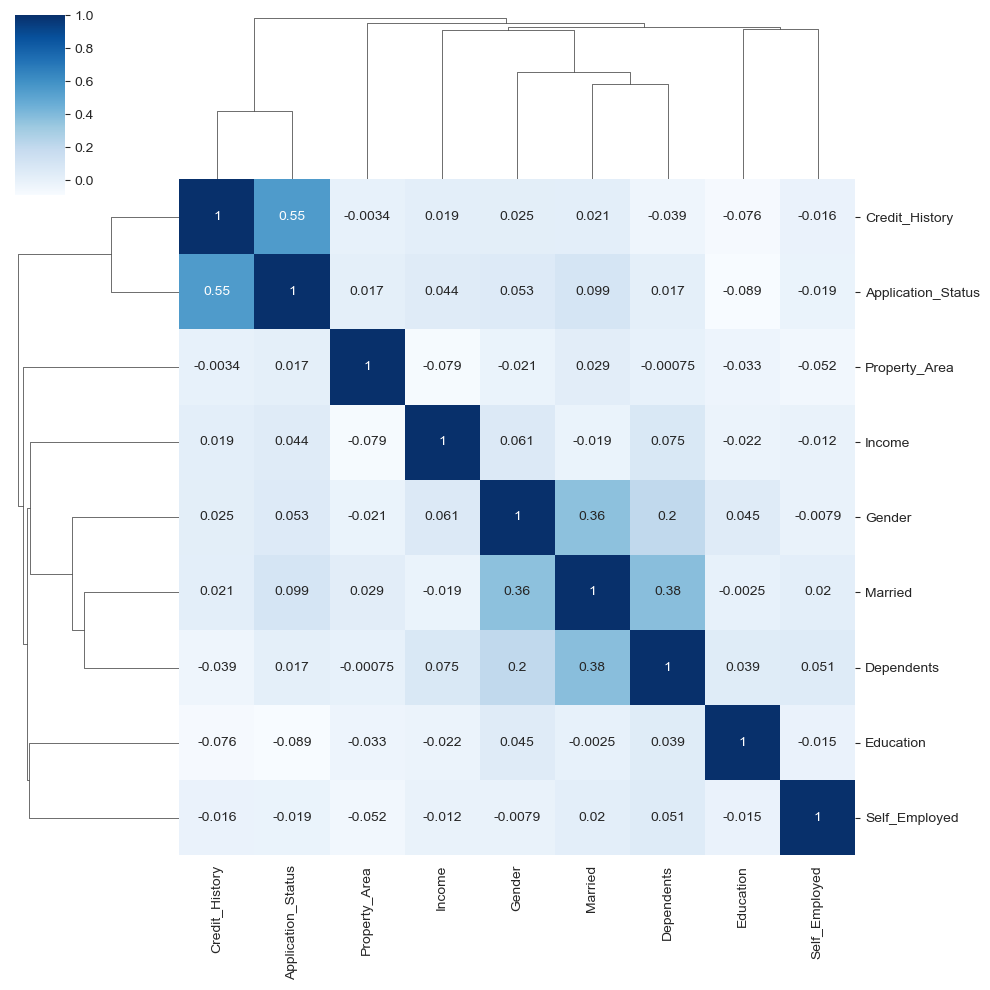

In [179]:
sb.clustermap(data.corr(),cmap='Blues',annot=True)
#credit history is correlated with application status

## Other models - Accuracy %

In [180]:
X_train=data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History','Property_Area', 'Income']]
Y_train=data.Application_Status

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3,
                                                    random_state=10)

In [181]:
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(random_state = 0)
classifier1.fit(X_train, Y_train)
#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier2.fit(X_train, Y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier3 = SVC(kernel = 'linear', random_state = 0)
classifier3.fit(X_train, Y_train)
# Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
classifier4 = SVC(kernel = 'rbf', random_state = 1)
classifier4.fit(X_train, Y_train)
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
classifier5 = GaussianNB()
classifier5.fit(X_train, Y_train)
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
classifier6 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier6.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [182]:
Y_pred1 = classifier1.predict(X_test)
Y_pred2 = classifier2.predict(X_test)
Y_pred3 = classifier3.predict(X_test)
Y_pred4 = classifier4.predict(X_test)
Y_pred5= classifier5.predict(X_test)
Y_pred6 = classifier6.predict(X_test)

print(accuracy_score(Y_test, Y_pred1))
print(accuracy_score(Y_test, Y_pred2))
print(accuracy_score(Y_test, Y_pred3))
print(accuracy_score(Y_test, Y_pred4))
print(accuracy_score(Y_test, Y_pred5))
print(accuracy_score(Y_test, Y_pred6))

0.8311688311688312
0.7467532467532467
0.8376623376623377
0.8376623376623377
0.8311688311688312
0.7337662337662337
